In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the data set
df = pd.read_csv('HR_Employee_Attrition_Cleaned.csv')

In [ ]:
# Displaying the first five rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [ ]:
# Displaying the last five rows
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,...,Excellent,Very High,0,17,3,Good,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,Bachelor,Medical,Medium,Male,...,Excellent,Low,0,6,3,Best,4,3,1,2


In [ ]:
# Displaying the shape and structure of the DataFrame

print(f"Shape of the DataFrame           : {df.shape}")
print(f"Total Number of Rows (Observations): {df.shape[0]}")
print(f"Total Number of Columns (Features) : {df.shape[1]}")


Shape of the DataFrame           : (1470, 31)
Total Number of Rows (Observations): 1470
Total Number of Columns (Features) : 31


**Exploratory Data Analysis**

**1- Visualizing the Employee Attrition Rate**

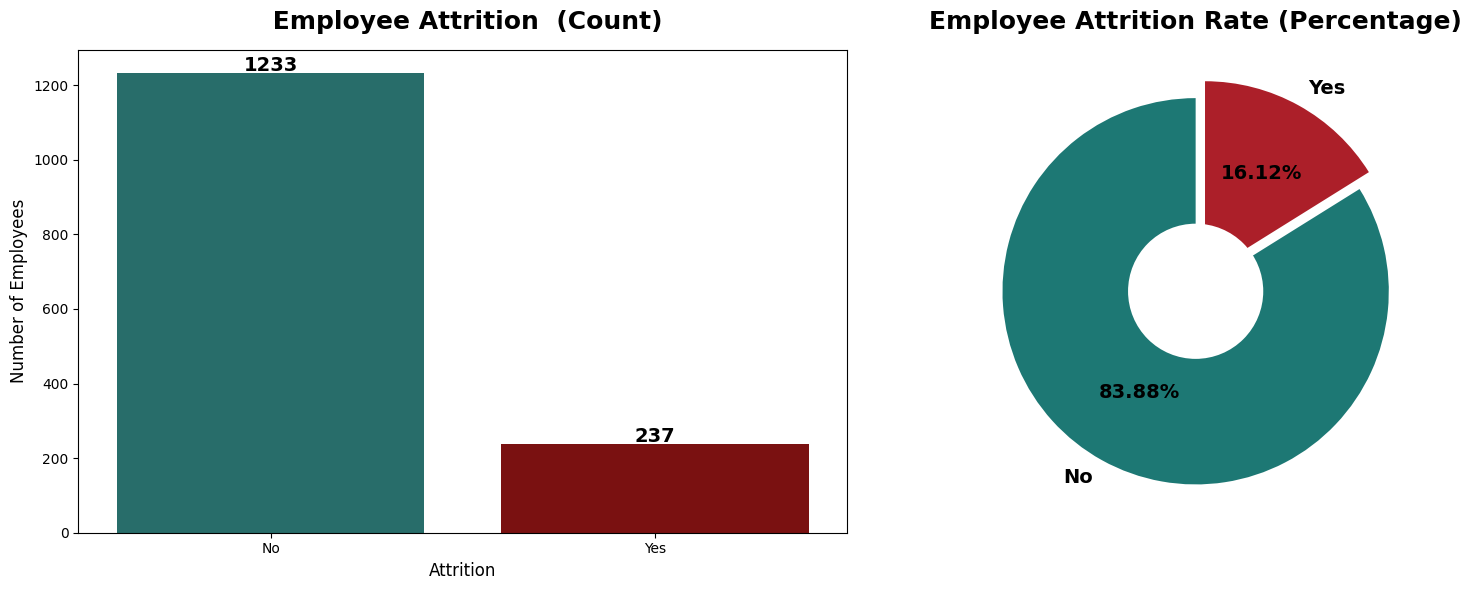

In [ ]:
## Visualizing Employee Attrition - Count and Percentage Side-by-Side

# Computing count of attrition labels
attrition_counts = df['Attrition'].value_counts()
attrition_labels = ['No', 'Yes']

# Creating a figure with two subplots: Bar Chart and Pie Chart
plt.figure(figsize=(16, 6))

# Subplot 1: Count of Attrition Cases
plt.subplot(1, 2, 1)
sns.barplot(x=attrition_labels, y=attrition_counts.values, palette=["#1d7874", "#8B0000"])
plt.title(" Employee Attrition  (Count)", fontsize=18, fontweight="bold", pad=15)
plt.ylabel("Number of Employees", fontsize=12)
plt.xlabel("Attrition", fontsize=12)

# Annotating each bar with its count
for idx, count in enumerate(attrition_counts.values):
    plt.text(x=idx, y=count + 5, s=str(count), ha='center', fontsize=14, fontweight='bold')

# Subplot 2: Attrition as Percentage (Pie Chart)
plt.subplot(1, 2, 2)
explode = [0, 0.1]  # Emphasize the "Yes" slice
colors = ["#1d7874", "#AC1F29"]

plt.pie(attrition_counts,
        labels=attrition_labels,
        autopct="%1.2f%%",
        startangle=90,
        colors=colors,
        explode=explode,
        textprops={'fontsize': 14, 'fontweight': 'bold'})

# Adding a white circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.35, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Employee Attrition Rate (Percentage)", fontsize=18, fontweight="bold", pad=15)

# Displaying both charts
plt.tight_layout()
plt.show()


The visualizations above present a clear and compelling depiction of employee attrition within the organization. On the left, the bar chart highlights the absolute count of employees who stayed versus those who left: out of 1,470 employees, 1,233 remained with the company while 237 exited, representing a notable difference in group sizes. On the right, the donut-style pie chart breaks this down into percentages, showing that **16.12%** of employees have attrited, while **83.88%** have remained. This relatively moderate attrition rate aligns with industry benchmarks, where experts consider an annual attrition rate between **10% to 15%** as healthy depending on the industry and organization size. Rates exceeding 15% may indicate underlying issues such as job dissatisfaction, poor management, or limited growth opportunities (Society for Human Resource Management, 2022; Beheshti, 2019; Gallup, n.d.) According to the Society for Human Resource Management (SHRM), companies should aim to monitor attrition trends closely, especially if they cross the 15–20% threshold, as sustained high turnover often signals deeper cultural or operational concerns. Therefore, while this 16.12% attrition rate is within a tolerable range, it warrants further exploration into the drivers of turnover to ensure long-term organizational health and talent retention.

References :

1. Society for Human Resource Management. (2022). Attrition: Definition, Types, Causes, Mitigation Tips. Retrieved from https://www.shrm.org/topics-tools/news/employee-relations/attrition-definition-types-causes-mitigation-tips

2. Beheshti, N. (2019, January 16). 10 Timely Statistics About the Connection Between Employee Engagement and Wellness. Forbes. Retrieved from https://www.forbes.com/sites/nazbeheshti/2019/01/16/10-timely-statistics-about-the-connection-between-employee-engagement-and-wellness

3. Gallup. (n.d.). Retention. Retrieved from https://www.gallup.com/topic/RETENTION.aspx

**2 - Analyzing Employee Attrition by Gender**

**Question : How is attrition dependent on Gender?**

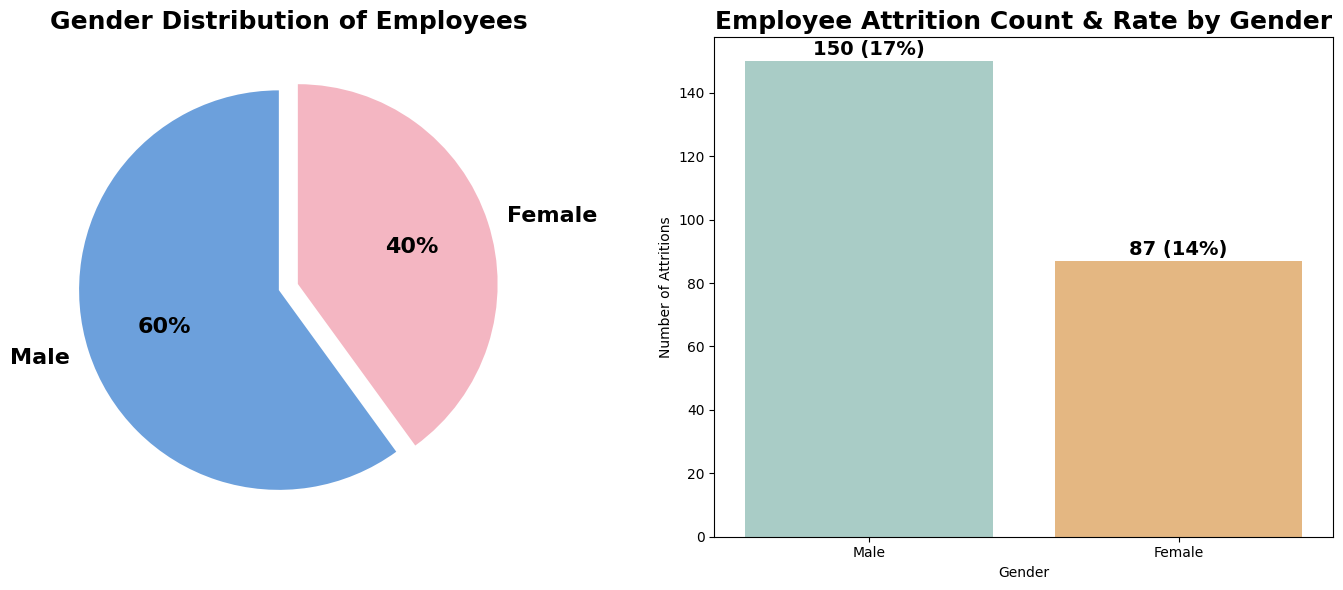

In [ ]:
## Gender-Based Analysis of Total Workforce and Attrition

# Preparing the figure layout
plt.figure(figsize=(14, 6))

# Subplot 1: Distribution of All Employees by Gender
plt.subplot(1, 2, 1)
gender_counts = df["Gender"].value_counts()

plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%.0f%%",
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 16, "fontweight": "bold"},
    colors=["#6CA0DC", "#F4B6C2"]  # blue & rose
)

plt.title("Gender Distribution of Employees", fontsize=18, fontweight="bold")

# Subplot 2: Employee Attrition by Gender
plt.subplot(1, 2, 2)

# Filtering the dataset to include only employees who left the company
left_employees = df[df["Attrition"] == "Yes"]

# Counting gender distribution for total and attrited employees
total_by_gender = df["Gender"].value_counts()
attrition_by_gender = left_employees["Gender"].value_counts()

# Calculating attrition rate (%) per gender
gender_attrition_rate = np.floor((attrition_by_gender / total_by_gender) * 100).values

# Plotting attrition count per gender
sns.barplot(
    x=attrition_by_gender.index,
    y=attrition_by_gender.values,
    palette=["#A3D2CA", "#F5B971"]
)

# Adding annotated labels showing count and percentage
for i, value in enumerate(attrition_by_gender.values):
    plt.text(
        i, value + 2,
        f"{value} ({int(gender_attrition_rate[i])}%)",
        ha="center",
        fontsize=14,
        fontweight="bold"
    )

plt.title("Employee Attrition Count & Rate by Gender", fontsize=18, fontweight="bold")
plt.ylabel("Number of Attritions")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()


The visualizations above provide a gender-based overview of the workforce and attrition trends within the organization. The pie chart on the left reveals that **60% of employees are male, while 40% are female**, indicating a moderately male-dominated workforce. On the right, the bar chart focuses specifically on attrition, showing that **150 males and 87 females** have left the organization. When adjusted for the gender proportions in the workforce, the attrition rates are **17% for males and 14% for females**, suggesting that male employees are leaving at a slightly higher rate than their female counterparts. While the overall attrition rate remains relatively consistent across genders, this slight disparity may warrant further investigation into gender-specific drivers of turnover, such as differences in job roles, work-life balance expectations, or career development opportunities.

**3 - Analyzing Employee Attrition by Age**

**Question: How is attrition dependent on Age?**

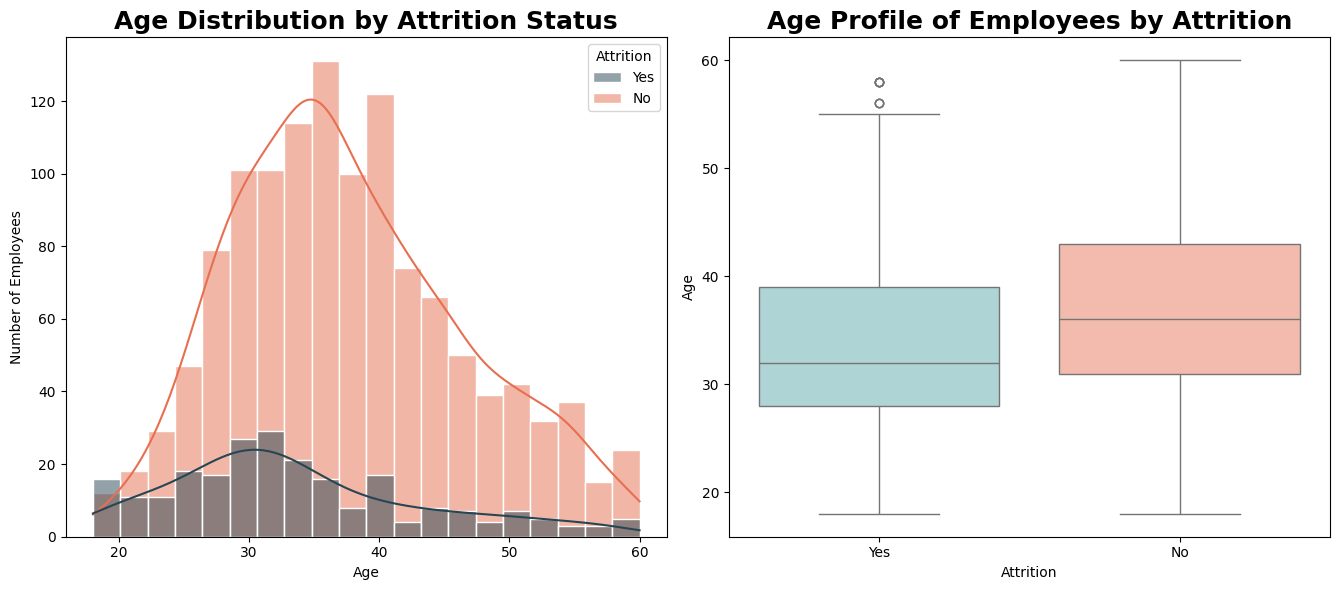

In [ ]:
## Age-Based Analysis of Employee Population and Attrition Patterns

# Setting figure size for side-by-side comparison
plt.figure(figsize=(13.5, 6))

# Subplot 1: Histogram of Age Distribution with Attrition Overlay
plt.subplot(1, 2, 1)
sns.histplot(
    data=df,
    x="Age",
    hue="Attrition",
    kde=True,
    palette=["#264653", "#E76F51"],
    bins=20,
    edgecolor="white"
)
plt.title("Age Distribution by Attrition Status", fontsize=18, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Number of Employees")

# Subplot 2: Boxplot Showing Age Spread by Attrition
plt.subplot(1, 2, 2)
sns.boxplot(
    data=df,
    x="Attrition",
    y="Age",
    palette=["#A8DADC", "#FFB4A2"]
)
plt.title("Age Profile of Employees by Attrition", fontsize=18, fontweight="bold")
plt.xlabel("Attrition")
plt.ylabel("Age")

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()


The visualizations above offer valuable insight into the relationship between employee age and attrition behavior. On the left, the histogram overlays the age distribution of employees who stayed with those who left the organization. It reveals that **younger employees, particularly those in their late 20s to early 30s, are more likely to attrite**, as evidenced by the darker (attrition = "Yes") bars concentrated in that range. Conversely, older employees (aged 40 and above) are less likely to leave, with the majority of the "No" attrition group falling into that segment. The right-hand boxplot reinforces this trend: the median age of employees who left is noticeably lower than those who stayed, with the attrition group showing a slightly compressed and left-skewed age distribution. These findings suggest that **age—and by extension, career stage—may play a significant role in turnover**, potentially due to factors such as early-career exploration, dissatisfaction, or a desire for advancement not yet realized. For HR and organizational leaders, this highlights the importance of targeted retention strategies for younger talent, such as career development programs, mentorship, and competitive compensation early in their tenure.

**4- Analyzing Employee Attrition by Business Travel**

**Question : Does Business Travel impact Attrition ?**

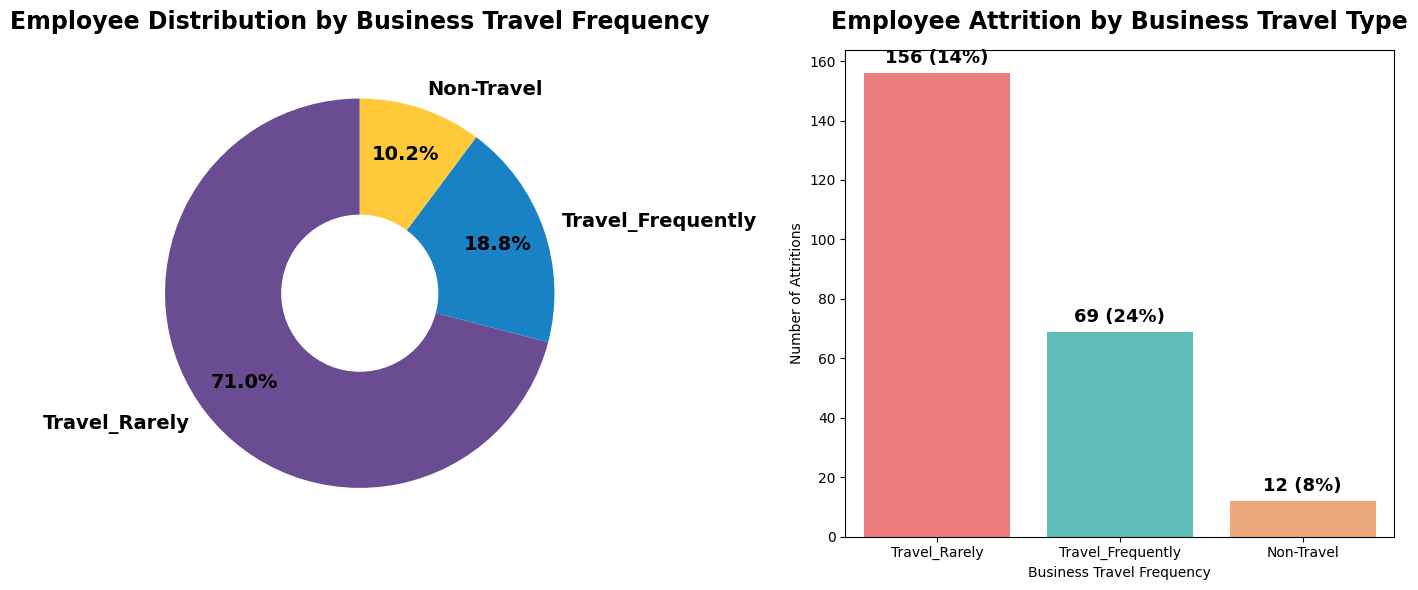

In [ ]:
## Analyzing How Business Travel Frequency Relates to Overall Distribution and Attrition

# Setting figure size for side-by-side plots
plt.figure(figsize=(14, 6))

# Subplot 1: Donut Pie Chart – Employee Distribution by Business Travel Frequency
plt.subplot(1, 2, 1)
travel_counts = df["BusinessTravel"].value_counts()

# Defining custom colors
colors = ["#6A4C93", "#1982C4", "#FFCA3A"]  # purple, blue, yellow

plt.pie(
    travel_counts.values,
    labels=travel_counts.index,
    autopct="%.1f%%",
    pctdistance=0.75,
    startangle=90,
    textprops={"fontsize": 14, "fontweight": "bold"},
    colors=colors
)

# Adding a white circle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(centre_circle)
plt.title("Employee Distribution by Business Travel Frequency", fontsize=17, fontweight="bold", pad=15)

# Subplot 2: Bar Chart – Attrition Count & Rate by Business Travel Frequency
plt.subplot(1, 2, 2)

# Filtering attrition data
attrited = df[df["Attrition"] == "Yes"]
attrition_travel = attrited["BusinessTravel"].value_counts()

# Calculating attrition percentage per travel category
attrition_percent = np.floor((attrition_travel / travel_counts) * 100).values

# Defining custom palette
bar_colors = ["#FF6B6B", "#4ECDC4", "#FFA36C"]

sns.barplot(
    x=attrition_travel.index,
    y=attrition_travel.values,
    palette=bar_colors
)

# Annotating bars with count and percentage
for i, count in enumerate(attrition_travel.values):
    label = f"{count} ({int(attrition_percent[i])}%)"
    plt.text(i, count + 2, label, ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Employee Attrition by Business Travel Type", fontsize=17, fontweight="bold", pad=15)
plt.xlabel("Business Travel Frequency")
plt.ylabel("Number of Attritions")

# Optimizing layout
plt.tight_layout()
plt.show()


The visualizations provide a clear breakdown of how business travel frequency relates to employee attrition. The donut chart on the left illustrates that the majority of employees—**71%—**travel rarely for work, followed by **18.8%** who travel frequently, and a smaller group, **10.2%**, who do not travel at all. However, the bar chart on the right reveals a more nuanced story: while those who travel rarely make up the largest portion of the workforce, they also account for the **highest number of attritions (156 employees), which translates to a 14% attrition rate**. Interestingly, employees who travel frequently, although fewer in number, exhibit a significantly higher attrition rate of 24%, indicating a strong association between frequent travel and employee turnover. In contrast, the non-travel group shows the lowest attrition rate at **8%**, suggesting greater stability among employees with minimal or no travel responsibilities. These patterns suggest that extensive travel could be a potential stressor or contributor to job dissatisfaction, and organizations may benefit from re-evaluating travel demands, offering flexible arrangements, or enhancing support systems for frequently traveling employees to improve retention.

**5- Analyzing Employee Attrition by Department**

**Question : Does the Department of Work Impact Attrition ?**

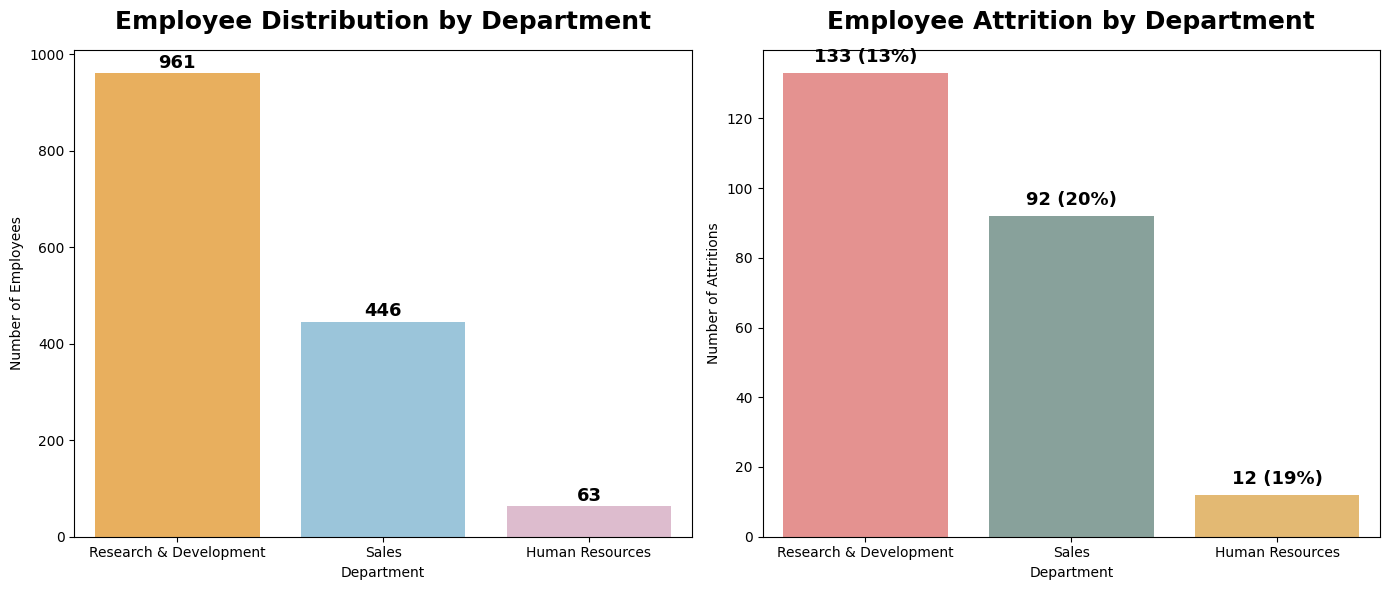

In [ ]:
## Analyzing Workforce and Attrition Patterns Across Departments

# Setting the figure size for side-by-side plots
plt.figure(figsize=(14, 6))

# Subplot 1: Bar Plot – Total Employees by Department
plt.subplot(1, 2, 1)
department_counts = df["Department"].value_counts()

# Defining custom color palette for department distribution
department_colors = ["#FFB347", "#91C8E4", "#E2B6CF"]

sns.barplot(
    x=department_counts.index,
    y=department_counts.values,
    palette=department_colors
)

# Annotating each bar with its value
for i, count in enumerate(department_counts.values):
    plt.text(i, count + 3, str(count), ha='center', va='bottom', fontsize=13, fontweight='bold')

plt.title("Employee Distribution by Department", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Department")
plt.ylabel("Number of Employees")

# Subplot 2: Bar Plot – Attrition Count & Rate by Department
plt.subplot(1, 2, 2)

# Filtering dataset for employees who left
attrited_employees = df[df["Attrition"] == "Yes"]
attrition_by_dept = attrited_employees["Department"].value_counts()

# Calculating attrition rate per department
attrition_percentage = np.floor((attrition_by_dept / department_counts) * 100).values

# Defining custom palette for attrition rate plot
attrition_colors = ["#F28482", "#84A59D", "#F6BD60"]

sns.barplot(
    x=attrition_by_dept.index,
    y=attrition_by_dept.values,
    palette=attrition_colors
)

# Adding annotations with both count and attrition rate
for i, count in enumerate(attrition_by_dept.values):
    label = f"{count} ({int(attrition_percentage[i])}%)"
    plt.text(i, count + 2, label, ha='center', va='bottom', fontsize=13, fontweight='bold')

plt.title("Employee Attrition by Department", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Department")
plt.ylabel("Number of Attritions")

# Adjusting layout to avoid overlapping elements
plt.tight_layout()
plt.show()


The visualizations above offer valuable insights into how employee distribution and attrition vary across departments. The bar chart on the left highlights that the **Research & Development** department comprises the largest portion of the workforce with **961 employees**, followed by **Sales with 446**, and **Human Resources** with a much smaller headcount of **63**. However, the chart on the right reveals that while **Research & Development** has the highest number of employees leaving (133), its attrition rate remains the lowest among the three at **13%**, indicating relatively stable retention. In contrast, the Sales department, despite having fewer employees, shows a higher attrition rate of **20%**, suggesting potential issues related to job stress, compensation, or workload. Notably, **Human Resources**, although the smallest in size, experiences a **19% attrition rate**, which is also concerning given the department’s critical role in employee engagement and retention.

**6- Analyzing Employee Attrition by Education**

**Question : Does the educational level impact Attrition ?**

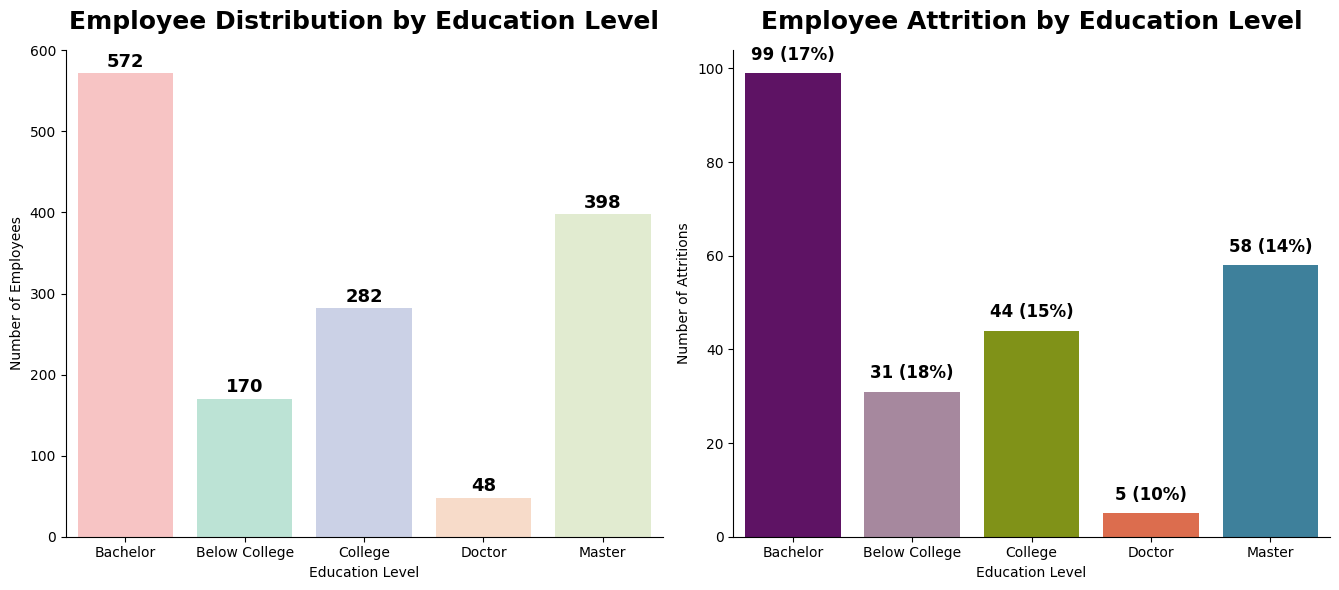

In [ ]:
## Visualizing Employee Count and Attrition by Education Level Without Outer Borders

plt.figure(figsize=(13.5, 6))

# Subplot 1: Total Employee Count by Education Level
plt.subplot(1, 2, 1)
education_counts = df["Education"].value_counts().sort_index()

# Customizing pastel palette for employee distribution
education_palette = ["#FFBCBC", "#B5EAD7", "#C7CEEA", "#FFDAC1", "#E2F0CB"]

sns.barplot(
    x=education_counts.index,
    y=education_counts.values,
    order=education_counts.index,
    palette=education_palette
)

# Annotating bar values
for idx, count in enumerate(education_counts.values):
    plt.text(idx, count + 3, str(count), ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Employee Distribution by Education Level", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Education Level")
plt.ylabel("Number of Employees")

# Removing top/right borders for a clean look
sns.despine()

# Subplot 2: Attrition by Education Level
plt.subplot(1, 2, 2)

attrited_df = df[df["Attrition"] == "Yes"]
attrition_counts = attrited_df["Education"].value_counts().sort_index()
attrition_percentage = np.floor((attrition_counts / education_counts) * 100)

attrition_palette = ["#6A0572", "#AB83A1", "#8EA604", "#F46036", "#2E86AB"]

sns.barplot(
    x=attrition_counts.index,
    y=attrition_counts.values,
    order=attrition_counts.index,
    palette=attrition_palette
)

# Annotate=ing each bar with attrition count and percentage
for idx, count in enumerate(attrition_counts.values):
    rate = attrition_percentage.iloc[idx]
    label = f"{count} ({int(rate)}%)" if not np.isnan(rate) else f"{count} (N/A)"
    plt.text(idx, count + 2, label, ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.title("Employee Attrition by Education Level", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Education Level")
plt.ylabel("Number of Attritions")

# Removing outer plot borders
sns.despine()

# Final layout adjustment
plt.tight_layout()
plt.show()


The dual bar charts above provide a compelling visualization of the relationship between employee education levels and attrition patterns. The left plot illustrates the distribution of employees across five education categories, with the majority holding a **Bachelor’s degree (572 employees), followed by Master’s degree holders (398) and College-level education (282)**. Fewer employees have **Below College** education (170), and only a small group (48) hold **Doctoral degrees**. On the right, the attrition chart reveals nuanced differences: while Bachelor's degree holders also account for the **highest number of attritions (99), their attrition rate is 17%**, which is slightly lower than the **18% rate among employees with Below College education**. Interestingly, **Doctorate holders exhibit the lowest attrition rate at just 10%**, despite their small population, suggesting higher retention among the most highly educated employees. Meanwhile, Master's and College degree holders show similar attrition rates of **14% and 15%**, respectively. These insights imply that attrition is not simply a function of education level alone, but potentially tied to job roles, career aspirations, and alignment between qualifications and organizational opportunities.

**7- Analyzing Employee Attrition by Education Field**

**Question: Does the educational field of the employees impact Attrition ?**

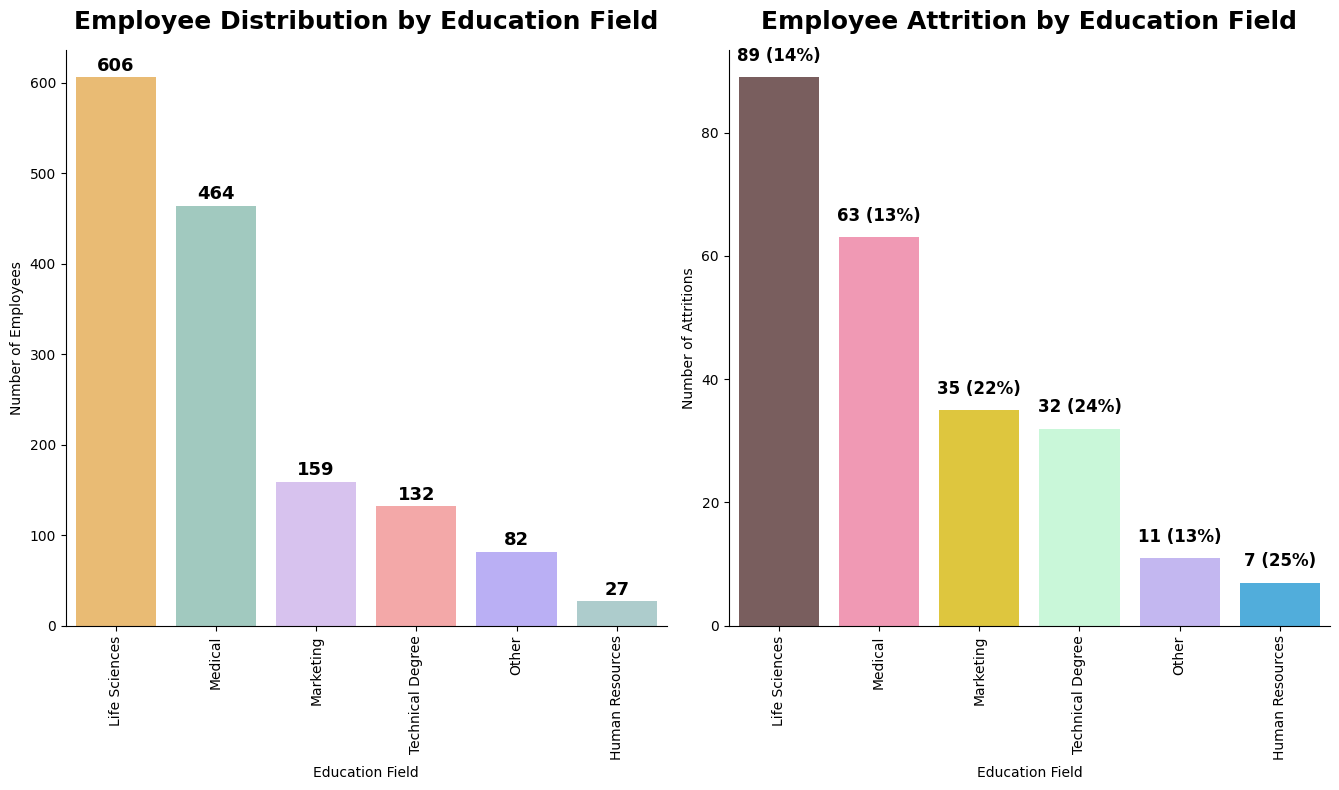

In [ ]:
## Visualizing Total Employees and Attrition by Education Field
plt.figure(figsize=(13.5, 8))

# Subplot 1: Employee Count by Education Field
plt.subplot(1, 2, 1)
field_counts = df["EducationField"].value_counts()

# Defining a new set of colors for visual differentiation
field_palette = ["#FDBF60", "#9AD0C2", "#D7BBF5", "#FF9B9B", "#B2A4FF", "#A8D1D1"]

sns.barplot(
    x=field_counts.index,
    y=field_counts.values,
    order=field_counts.index,
    palette=field_palette
)

# Annotating each bar with its value
for idx, count in enumerate(field_counts.values):
    plt.text(idx, count + 3, str(count), ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Employee Distribution by Education Field", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Education Field")
plt.ylabel("Number of Employees")
plt.xticks(rotation=90)
sns.despine()

# Subplot 2: Attrition Count and Rate by Education Field
plt.subplot(1, 2, 2)
attrited_df = df[df["Attrition"] == "Yes"]
attrition_by_field = attrited_df["EducationField"].value_counts()

# Calculating attrition rate safely
attrition_rate = np.floor((attrition_by_field / field_counts) * 100).fillna(0).values

# Defining palette for attrition chart
attrition_palette = ["#7D5A5A", "#FF8AAE", "#F9D923", "#C1FFD7", "#BEADFA", "#3AB4F2"]

sns.barplot(
    x=attrition_by_field.index,
    y=attrition_by_field.values,
    order=attrition_by_field.index,
    palette=attrition_palette
)

# Annotating with attrition count and percentage
for idx, count in enumerate(attrition_by_field.values):
    label = f"{count} ({int(attrition_rate[idx])}%)"
    plt.text(idx, count + 2, label, ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.title("Employee Attrition by Education Field", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Education Field")
plt.ylabel("Number of Attritions")
plt.xticks(rotation=90)
sns.despine()

# Final layout adjustments
plt.tight_layout()
plt.show()


The visualizations above illustrate the distribution of employees and attrition rates across various education fields. In the left chart, the majority of employees come from **Life Sciences (606 employees) and Medical (464 employees)** backgrounds, indicating these fields dominate the organization's workforce. Other fields such as **Marketing (159), Technical Degree (132), Other (82), and Human Resources (27)** make up smaller portions. However, the right chart paints a more nuanced picture when we examine attrition. While Life Sciences has the highest number of departures **(89 employees)**, its **attrition rate stands at 14%**, lower than several other fields. Notably, **Human Resources**, despite its small size, has the highest attrition rate at **25%**, followed closely by **Technical Degree (24%)** and **Marketing (22%)**, suggesting these fields may face higher turnover challenges. Conversely, **Medical and Other fields** show lower attrition rates at **13%**, indicating relatively higher employee retention. These patterns suggest that although certain fields contribute more to headcount, **attrition risk is not directly proportional to size**, and targeted interventions may be required for high-turnover areas regardless of their workforce share.

**8- Analyzing Environment Satisfaction**

**Question: How does the environment satisfaction impact attrition?**

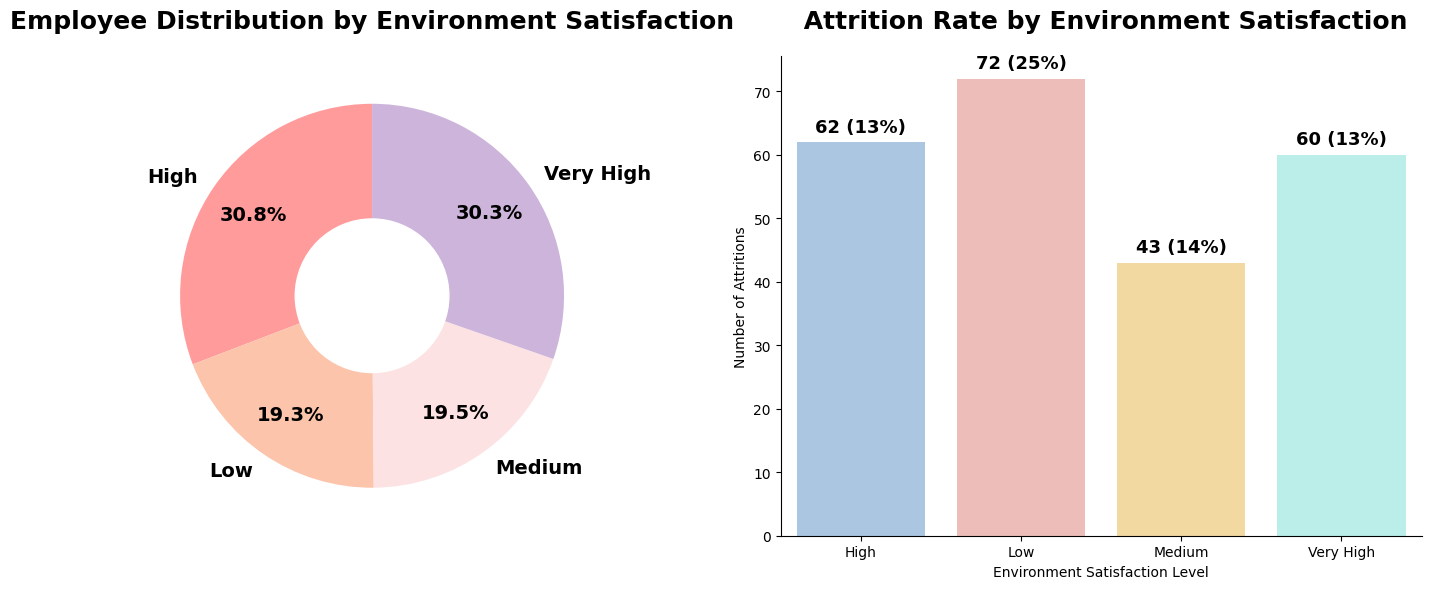

In [ ]:
## Analyzing Employee Distribution and Attrition Based on Environment Satisfaction

plt.figure(figsize=(14, 6))

# Subplot 1: Pie Chart - Distribution of Employees by Environment Satisfaction
plt.subplot(1, 2, 1)
env_satisfaction_counts = df["EnvironmentSatisfaction"].value_counts().sort_index()

# Defining custom colors for pie chart
pie_colors = ["#FF9B9B", "#FBC4AB", "#FDE2E4", "#CDB4DB"]

plt.pie(
    env_satisfaction_counts.values,
    labels=env_satisfaction_counts.index,
    autopct="%.1f%%",
    pctdistance=0.75,
    startangle=90,
    colors=pie_colors,
    textprops={"fontsize": 14, "fontweight": "bold"}
)

# Creating a white circle to make it a donut chart
center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)

plt.title("Employee Distribution by Environment Satisfaction", fontsize=18, fontweight="bold", pad=20)

# Subplot 2: Bar Plot - Attrition Count & Rate by Environment Satisfaction
plt.subplot(1, 2, 2)
attrited_df = df[df["Attrition"] == "Yes"]
env_satisfaction_attrition = attrited_df["EnvironmentSatisfaction"].value_counts().sort_index()

# Calculating attrition rate safely
attrition_rate = np.floor((env_satisfaction_attrition / env_satisfaction_counts) * 100).fillna(0).values

# Defining color palette for bar plot
bar_colors = ["#A1C6EA", "#F5B7B1", "#FFDD94", "#B2F7EF"]

sns.barplot(
    x=env_satisfaction_attrition.index,
    y=env_satisfaction_attrition.values,
    order=env_satisfaction_attrition.index,
    palette=bar_colors
)

# Annotating each bar with count and attrition rate
for i, count in enumerate(env_satisfaction_attrition.values):
    label = f"{count} ({int(attrition_rate[i])}%)"
    plt.text(i, count + 1, label, ha='center', va='bottom', fontsize=13, fontweight='bold')

plt.title(" Attrition Rate by Environment Satisfaction", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Environment Satisfaction Level")
plt.ylabel("Number of Attritions")

# Final layout and cleanup
plt.tight_layout()
sns.despine()
plt.show()


The visualizations above provide insights into how employee satisfaction with their work environment correlates with attrition levels. The left pie chart shows that most employees rated their environment satisfaction as either **"High" (30.8%) or "Very High" (30.3%)**, while smaller proportions reported **"Medium" (19.5%) or "Low" (19.3%)** satisfaction. Despite these distributions, the bar chart on the right reveals a critical finding: employees with **Low environment satisfaction have the highest attrition count (72 employees) and the highest attrition rate (25%)**, signaling a strong relationship between dissatisfaction and turnover. In contrast, attrition rates for employees reporting **High and Very High** satisfaction are significantly lower, both at **13%**, despite representing the largest segments of the workforce. Interestingly, even employees with **Medium satisfaction** have a slightly higher attrition rate of **14%**, suggesting that anything less than a highly satisfying environment could increase the risk of turnover. These findings highlight the importance of cultivating a positive work environment as a strategic lever for retaining talent.

**9 - Analyzing Employee Attrition by Job Level**

**Question: How does Job Level Impact Attrition?**

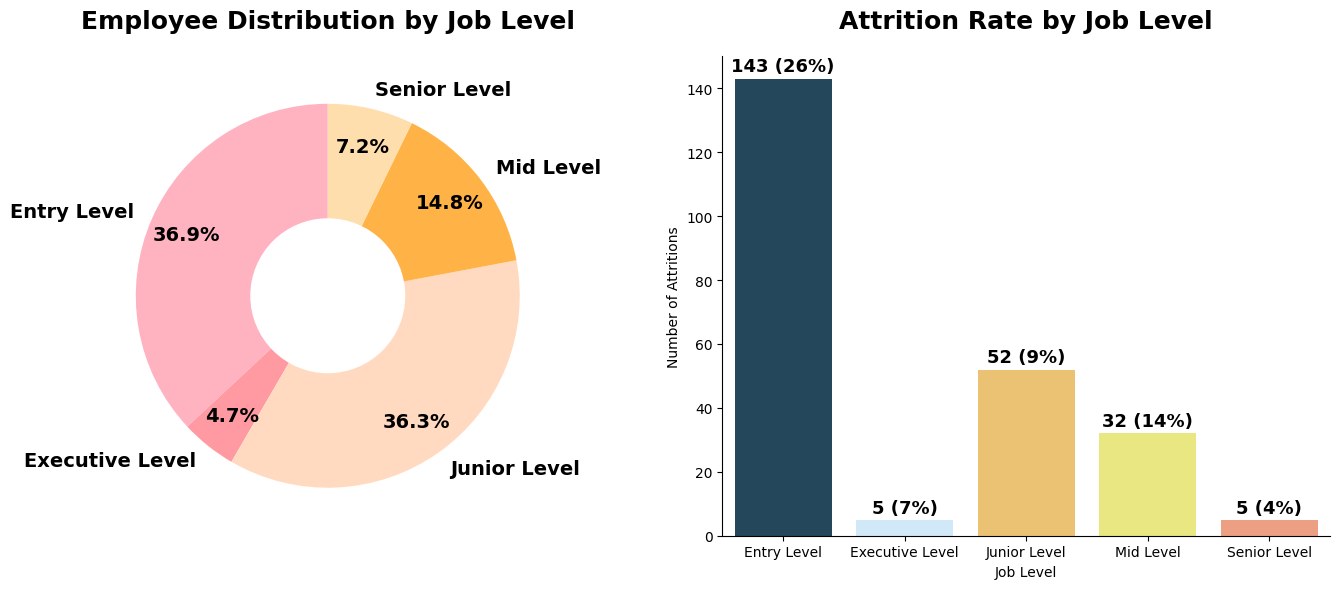

In [ ]:
## Analyzing Employee Count and Attrition Across Job Levels
plt.figure(figsize=(14, 6))

# Subplot 1: Donut Chart - Distribution of Employees by Job Level
plt.subplot(1, 2, 1)
job_level_counts = df["JobLevel"].value_counts().sort_index()

# Defining a custom color palette for the pie chart
job_level_colors = ["#FFB3C1", "#FF9AA2", "#FFDAC1", "#FFB347", "#FFDEAD"]

plt.pie(
    job_level_counts.values,
    labels=job_level_counts.index,
    autopct="%.1f%%",
    pctdistance=0.8,
    startangle=90,
    colors=job_level_colors,
    textprops={"fontsize": 14, "fontweight": "bold"}
)

# Adding a white circle to convert pie chart into a donut chart
center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)

plt.title("Employee Distribution by Job Level", fontsize=18, fontweight="bold", pad=20)

# Subplot 2: Bar Chart - Attrition Count & Rate by Job Level
plt.subplot(1, 2, 2)

# Filtering attrition data
attrited_df = df[df["Attrition"] == "Yes"]
job_level_attrition = attrited_df["JobLevel"].value_counts().sort_index()

# Computing attrition rate safely
attrition_percent = np.floor((job_level_attrition / job_level_counts) * 100).fillna(0).values

# Defining color palette for bar chart
bar_palette = ["#1B4965", "#CAE9FF", "#FFC75F", "#F9F871", "#FF9671"]

sns.barplot(
    x=job_level_attrition.index,
    y=job_level_attrition.values,
    order=job_level_attrition.index,
    palette=bar_palette
)

# Annotating bars with count and percentage
for i, count in enumerate(job_level_attrition.values):
    label = f"{count} ({int(attrition_percent[i])}%)"
    plt.text(i, count + 1, label, ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Attrition Rate by Job Level", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Job Level")
plt.ylabel("Number of Attritions")

# Final plot adjustments
sns.despine()
plt.tight_layout()
plt.show()


The visualizations above provide valuable insights into how attrition varies across different job levels within the organization. The donut chart on the left illustrates the distribution of employees by job level, showing that the largest proportions belong to the **Entry Level (36.9%) and Junior Level (36.3%)** categories, followed by **Mid Level (14.8%), Senior Level (7.2%)**, and a small fraction at the **Executive Level (4.7%)**. In contrast, the bar chart on the right reveals striking differences in attrition behavior. **Entry Level employees account for the highest number of attritions (143)**, representing a **26% attrition rate**, significantly higher than any other group. Although Junior Level roles also contribute a considerable number of attritions (52), their attrition rate is much lower at 9%, likely due to more stability or longer tenure at this stage. Interestingly, **Executive and Senior Level** roles exhibit both low attrition counts (5 each) and the lowest attrition rates (**7% and 4%**, respectively), highlighting strong retention among more experienced employees. These results suggest that attrition is disproportionately concentrated in the earliest career stages, indicating a potential need for targeted onboarding support, career development opportunities, and engagement strategies for newer hires to improve retention.

**10- Analyzing Employee Attrition by Job Satisfaction**

**Question: How does self Job Satisfaction impact the Attrition?**

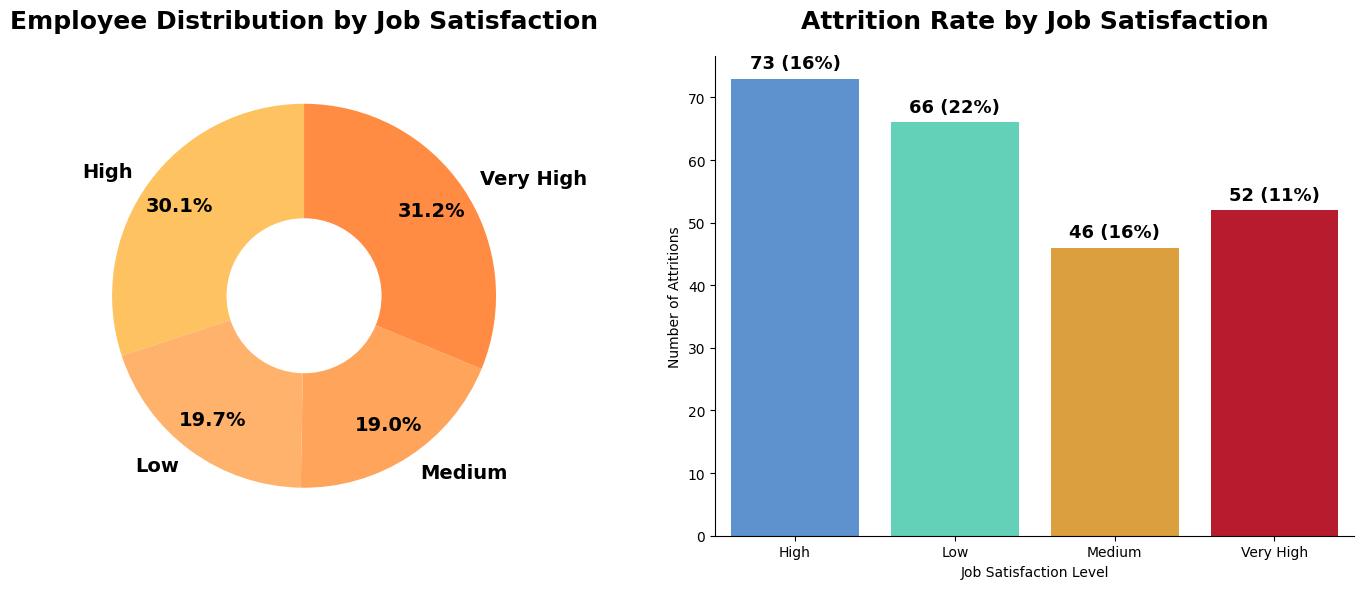

In [ ]:
## Analyzing employee distribution and attrition across job satisfaction levels

plt.figure(figsize=(14, 6))

# Subplot 1: Donut Chart - Employee Distribution by Job Satisfaction
plt.subplot(1, 2, 1)
satisfaction_counts = df["JobSatisfaction"].value_counts().sort_index()

# Customizing color palette for satisfaction levels
satisfaction_colors = ["#FEC260", "#FFB26B", "#FFA45B", "#FF8C42"]

# Creating the pie chart
plt.pie(
    satisfaction_counts.values,
    labels=satisfaction_counts.index,
    autopct="%.1f%%",
    pctdistance=0.8,
    startangle=90,
    colors=satisfaction_colors,
    textprops={"fontsize": 14, "fontweight": "bold"}
)

# Converting to donut chart by overlaying a white circle
center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)

plt.title("Employee Distribution by Job Satisfaction", fontsize=18, fontweight="bold", pad=20)

# Subplot 2: Bar Chart - Attrition Count & Rate by Job Satisfaction
plt.subplot(1, 2, 2)

# Filtering dataset for employees who left
attrited_df = df[df["Attrition"] == "Yes"]
satisfaction_attrition = attrited_df["JobSatisfaction"].value_counts().sort_index()

# Computing attrition percentage for each satisfaction level
attrition_percent = np.floor((satisfaction_attrition / satisfaction_counts) * 100).fillna(0).values

# Customizing palette for the bar chart
attrition_palette = ["#4A90E2", "#50E3C2", "#F5A623", "#D0021B"]

# Creating the bar plot
sns.barplot(
    x=satisfaction_attrition.index,
    y=satisfaction_attrition.values,
    order=satisfaction_attrition.index,
    palette=attrition_palette
)

# Annotating each bar with attrition count and rate
for i, count in enumerate(satisfaction_attrition.values):
    label = f"{count} ({int(attrition_percent[i])}%)"
    plt.text(i, count + 1, label, ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Attrition Rate by Job Satisfaction", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Number of Attritions")

# Clean layout
sns.despine()
plt.tight_layout()
plt.show()


The dual visualizations above offer a comprehensive view of how job satisfaction levels correlate with employee attrition. On the left, the donut chart displays the distribution of employees across four levels of job satisfaction: **Very High (31.2%), High (30.1%), Low (19.7%), and Medium (19.0%)**. This relatively even spread suggests that the workforce is fairly balanced in terms of perceived satisfaction. However, the bar chart on the right reveals a more nuanced story: while the highest number of attritions occurred among employees with **High satisfaction (73 attritions, 16%), the attrition rate is most severe among those with Low satisfaction (22%)**, despite their smaller population size. Employees with **Very High satisfaction show the lowest attrition rate at just 11%**, underscoring the importance of positive job sentiment as a retention factor. Interestingly, those with Medium satisfaction also experience a moderate attrition rate of 16%, indicating that only the most satisfied employees are significantly less likely to leave. Overall, this analysis highlights that while satisfaction alone does not completely prevent attrition, **higher satisfaction clearly correlates with improved retention outcomes**, making job satisfaction a key lever for HR intervention.









**11- Analyzing Employee Attrition by Monthly Income**

**Question: Is Income a main factor towards employee attrition**

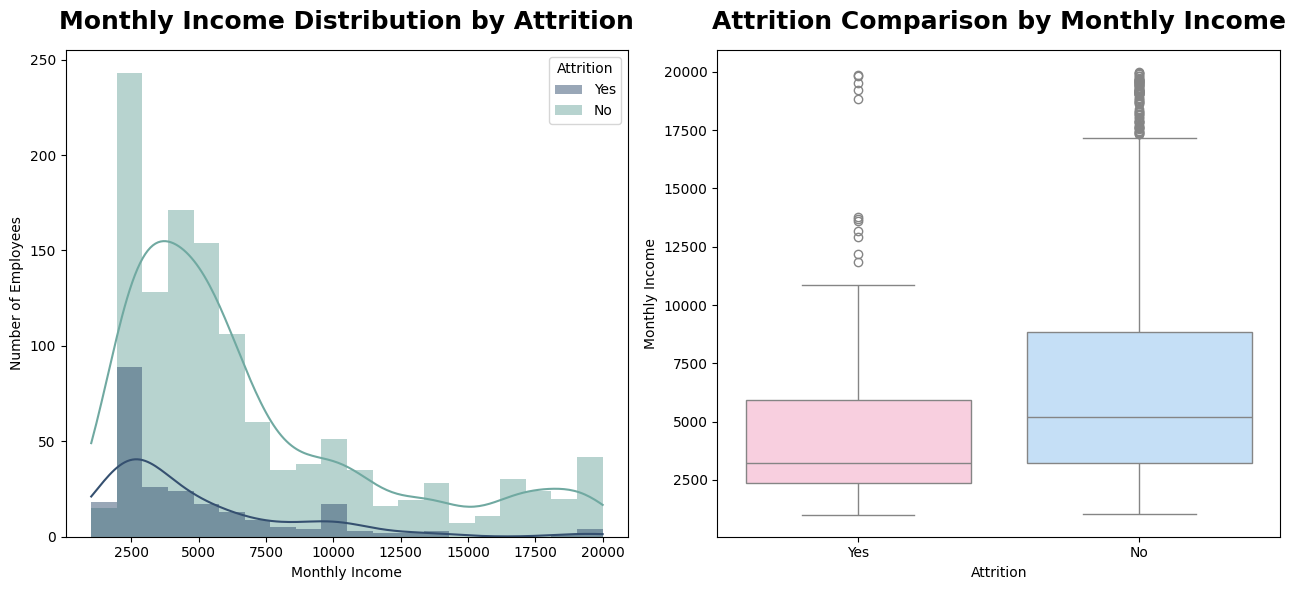

In [ ]:
## Exploring how Monthly Income relates to Attrition

plt.figure(figsize=(13, 6))

# Subplot 1: Distribution Plot - Monthly Income Colored by Attrition Status
plt.subplot(1, 2, 1)

sns.histplot(
    data=df,
    x="MonthlyIncome",
    hue="Attrition",
    kde=True,
    palette=["#355070", "#70A9A1"],
    edgecolor=None
)

plt.title("Monthly Income Distribution by Attrition", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Monthly Income")
plt.ylabel("Number of Employees")

# Subplot 2: Box Plot - Monthly Income Across Attrition Categories
plt.subplot(1, 2, 2)

sns.boxplot(
    data=df,
    x="Attrition",
    y="MonthlyIncome",
    palette=["#FFC8DD", "#BDE0FE"]
)

plt.title("Attrition Comparison by Monthly Income", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")

# Final layout adjustments
plt.tight_layout()
plt.show()


The visualizations above offer a clear examination of how monthly income correlates with employee attrition. The histogram on the left reveals a striking pattern: employees who left the company (“Yes” for attrition) tend to cluster at the lower end of the income scale, with the majority earning less than 5,000 USD per month. Meanwhile, employees who remained (“No” for attrition) are more broadly distributed across the income spectrum, including higher income brackets above 10,000 USD. This trend is further reinforced by the boxplot on the right, which shows that the median income of those who left is substantially lower than that of those who stayed. In addition, the upper quartile for employees who did not attrit extends well into higher income ranges, while employees who left tend to be concentrated in lower to mid-income brackets. These visual cues suggest a strong negative relationship between monthly income and attrition**—employees with lower earnings are more likely to leave**, which may be indicative of financial dissatisfaction or lack of perceived upward mobility. Addressing compensation structures or offering growth opportunities could be strategic levers for improving retention among lower-paid employees.




**12- Analyzing Employee Attrition by Salary Hike**

**Question: Does the Percentage Salary Hike Impact Attrition?**

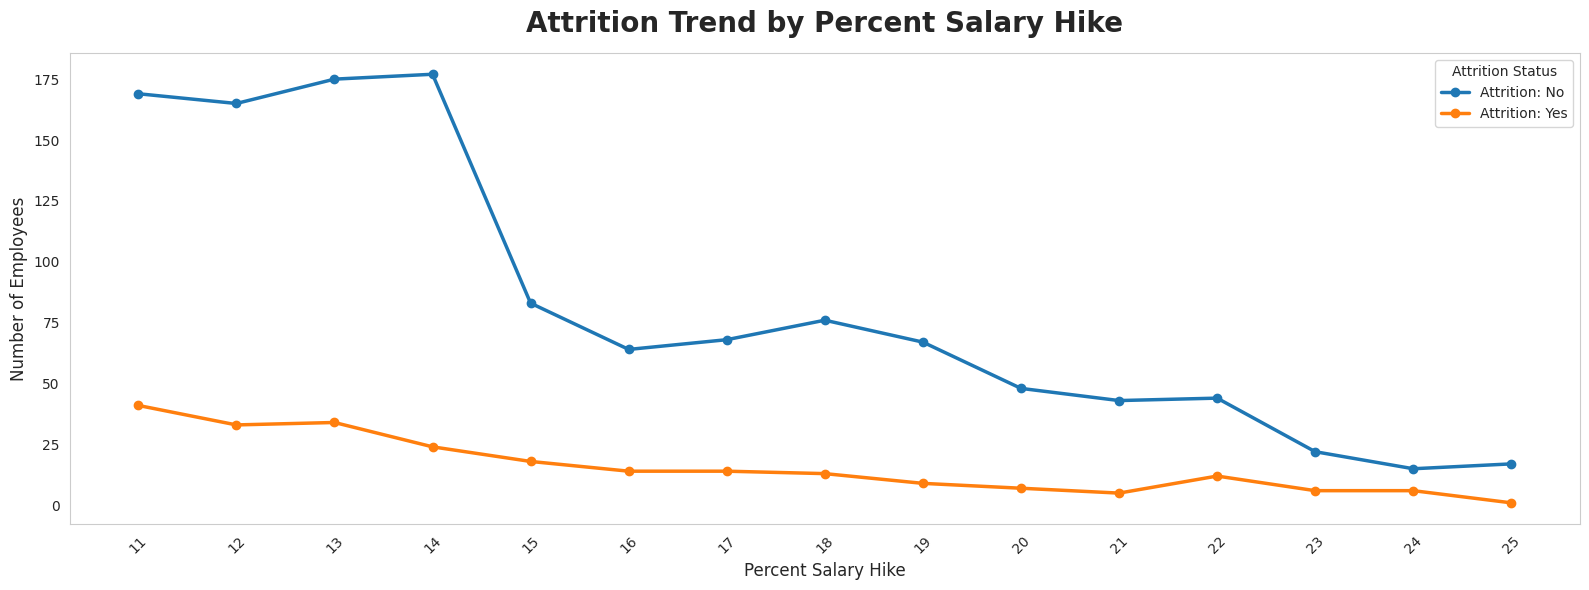

In [ ]:
## Trend Analysis: Percent Salary Hike vs Employee Attrition

# Aggregating data by PercentSalaryHike and Attrition
salary_hike_grouped = (
    df.groupby(['PercentSalaryHike', 'Attrition'])
    .size()
    .reset_index(name='EmployeeCount')
)

# Pivoting for easy plotting
salary_hike_pivot = salary_hike_grouped.pivot(index='PercentSalaryHike', columns='Attrition', values='EmployeeCount').fillna(0)

# Plotting as a line chart
plt.figure(figsize=(16, 6))

# Plotting each attrition category as a separate line
for status in salary_hike_pivot.columns:
    plt.plot(
        salary_hike_pivot.index,
        salary_hike_pivot[status],
        marker='o',
        linewidth=2.5,
        label=f"Attrition: {status}"
    )

# Chart aesthetics
plt.title("Attrition Trend by Percent Salary Hike", fontsize=20, fontweight="bold", pad=15)
plt.xlabel("Percent Salary Hike", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.legend(title="Attrition Status")
plt.xticks(salary_hike_pivot.index, rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()


The line chart above illustrates the relationship between** percent salary hike **and **employee attrition** status within the organization. Two distinct trends emerge: employees who did not leave the company (“Attrition: No”) consistently represent a larger group across all salary hike levels, while those who left (“Attrition: Yes”) form a noticeably smaller subset. Interestingly, **the number of attritions steadily declines as salary hikes increase**, with a notable drop-off after the 14% mark. This suggests that employees receiving higher salary increments are less likely to leave, reinforcing the idea that compensation growth can be a significant **retention lever**. Conversely, the “Attrition: No” group sees a sharp decline in population around the same point, indicating that most salary hikes beyond 14% are granted to a smaller, likely more retained group of employees. Overall, the chart underscores a clear inverse relationship between percent salary hike and attrition risk**—as salary hikes rise, employee departures diminish**, highlighting the strategic importance of performance-based compensation in workforce retention.

**13- Analyzing Employee Attrition by Work Life Balance text**

**Question: How does Work Life Balance Impact the Overall Attrition Rates?**


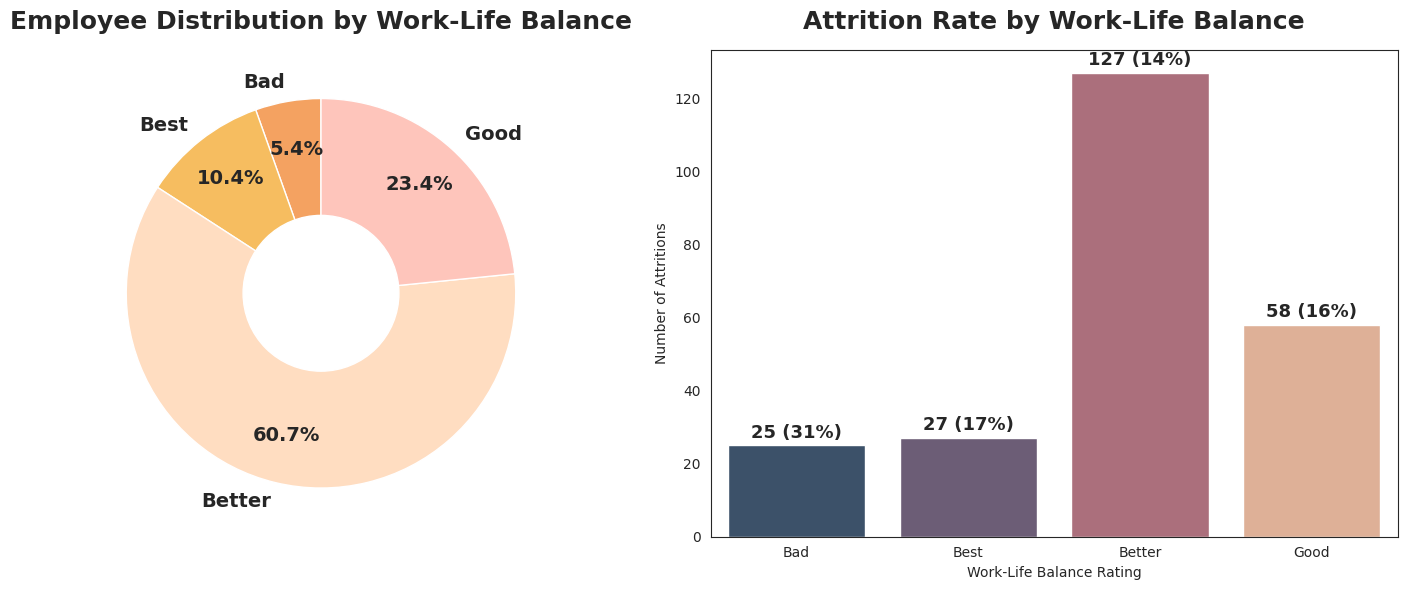

In [ ]:
## Visualizing Employee Distribution and Attrition Based on Work-Life Balance

plt.figure(figsize=(14.5, 6))

# Subplot 1: Donut Chart - Distribution by Work-Life Balance
plt.subplot(1, 2, 1)
wlb_counts = df["WorkLifeBalance"].value_counts().sort_index()

# Color palette for the pie chart
colors = ['#F4A261', '#F6BD60', '#FFDDC1', '#FEC5BB']

# Pie chart with a white center for donut style
plt.pie(
    wlb_counts.values,
    labels=wlb_counts.index,
    autopct="%.1f%%",
    startangle=90,
    pctdistance=0.75,
    textprops={"fontweight": "bold", "fontsize": 14},
    colors=colors
)

# Adding white circle in the center
center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)

plt.title("Employee Distribution by Work-Life Balance", fontsize=18, fontweight="bold", pad=15)

# Subplot 2: Bar Chart - Attrition Count & Rate by Work-Life Balance
plt.subplot(1, 2, 2)

# Filtering for employees who left
attrited = df[df["Attrition"] == "Yes"]
wlb_attrition_counts = attrited["WorkLifeBalance"].value_counts().sort_index()

# Calculating attrition percentages
attrition_percent = np.floor((wlb_attrition_counts / wlb_counts) * 100).fillna(0).astype(int).values

# Creating bar plot
ax = sns.barplot(
    x=wlb_attrition_counts.index,
    y=wlb_attrition_counts.values,
    order=wlb_attrition_counts.index,
    palette=["#355070", "#6D597A", "#B56576", "#EAAC8B"]
)

# Removing gridlines from the second plot
ax.grid(False)

# Annotating bars
for i, val in enumerate(wlb_attrition_counts.values):
    label = f"{val} ({attrition_percent[i]}%)"
    plt.text(i, val + 1, label, ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Attrition Rate by Work-Life Balance", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Work-Life Balance Rating")
plt.ylabel("Number of Attritions")

# Layout adjustment
plt.tight_layout()
plt.show()


The visualization offers a dual-perspective analysis of employee distribution and attrition in relation to their perceived work-life balance. On the left, the donut chart shows that a significant majority of employees (60.7%) rate their work-life balance as "Better," followed by "Good" (23.4%), "Best" (10.4%), and "Bad" (5.4%). Despite the positive distribution, the bar chart on the right reveals a noteworthy insight: while the "Bad" category comprises the smallest group of employees, it has the highest attrition rate at 31%, suggesting **a strong link between poor work-life balance and employee turnover**. Conversely, those reporting "Very High" satisfaction (Best) show a much lower attrition rate of 17%, and those in the "Better" category—despite being the largest group—have an attrition rate of just 14%. This disparity underscores the importance of maintaining a healthy work-life balance as a strategic lever for employee retention, reinforcing the notion that satisfaction in this area is a key determinant of workforce stability.









**14 - Analyzing Employee Attrition by Years with Current Manager**

**Question: Are managers a reason of people resigning?**

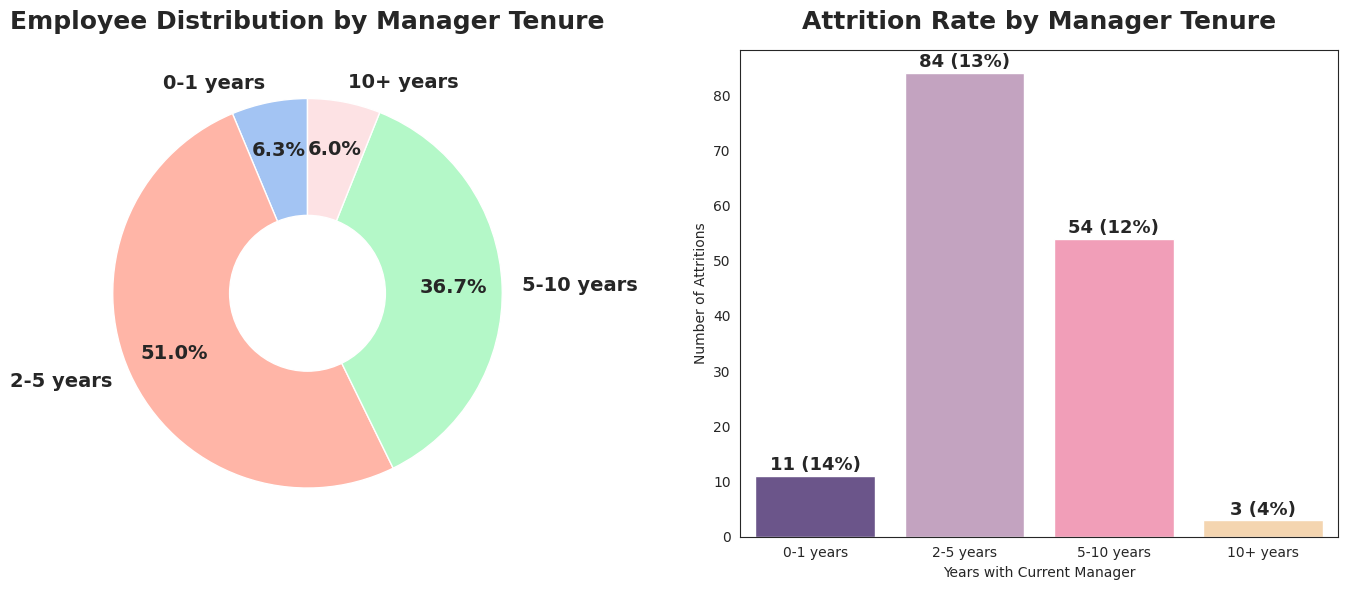

In [ ]:
# Categorizing employees by tenure with current manager
tenure_bins = [0, 1, 5, 10, 20]
tenure_labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

# Applying binning
df["ManagerTenureGroup"] = pd.cut(df["YearsWithCurrManager"], bins=tenure_bins, labels=tenure_labels)

# Creating Visualizations
plt.figure(figsize=(14, 6))

# Subplot 1: Donut Chart for Employee Distribution
plt.subplot(1, 2, 1)
tenure_counts = df["ManagerTenureGroup"].value_counts().sort_index()

donut_colors = ['#A3C4F3', '#FFB5A7', '#B4F8C8', '#FDE2E4']

plt.pie(
    tenure_counts.values,
    labels=tenure_counts.index,
    autopct="%.1f%%",
    startangle=90,
    pctdistance=0.75,
    colors=donut_colors,
    textprops={"fontsize": 14, "fontweight": "bold"}
)

center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)

plt.title("Employee Distribution by Manager Tenure", fontsize=18, fontweight="bold", pad=15)

# Subplot 2: Bar Chart for Attrition Rate by Tenure
plt.subplot(1, 2, 2)
attrited_df = df[df["Attrition"] == "Yes"]
attrition_counts = attrited_df["ManagerTenureGroup"].value_counts().sort_index()

# Calculating attrition percentages
attrition_pct = np.floor((attrition_counts / tenure_counts) * 100).fillna(0).astype(int).values

# Defining the color palette
bar_colors = ['#6A4C93', '#C89EC4', '#FF90B3', '#FFD6A5']

bar_plot = sns.barplot(
    x=attrition_counts.index,
    y=attrition_counts.values,
    palette=bar_colors
)

# Annotating each bar
for i, val in enumerate(attrition_counts.values):
    label = f"{val} ({attrition_pct[i]}%)"
    plt.text(i, val + 1, label, ha="center", fontsize=13, fontweight="bold")

bar_plot.grid(False)
plt.title("Attrition Rate by Manager Tenure", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Years with Current Manager")
plt.ylabel("Number of Attritions")

plt.tight_layout()
plt.show()


The visualizations above provide a clear breakdown of employee distribution and attrition trends based on the number of years employees have spent with their current manager. The pie chart on the left reveals that a significant majority of employees—51%—have worked with their manager for 2 to 5 years, followed by 36.7% who have been with their manager for 5 to 10 years. Only a small fraction fall into the extremes, with just 6.3% and 6.0% having managerial tenures of 0–1 year and over 10 years, respectively. The bar chart on the right complements this by highlighting attrition within each tenure category. Interestingly, the highest number of attritions (84 cases, or 13%) occurred among employees who have been with their manager for 2–5 years, while those with 0–1 year and 5–10 years had slightly lower attrition rates of 14% and 12%, respectively. Notably, employees with the longest managerial relationships (10+ years) demonstrated the lowest attrition rate at just 4%, suggesting a potential link between longer-term managerial relationships and increased employee retention. These insights could inform managerial continuity strategies and highlight the value of relationship longevity in reducing workforce turnover.

**15- Analyzing Employee Attrition by Years Since Last Promotion**

**Question: Does a lack of recent promotion contribute to higher employee attrition?**

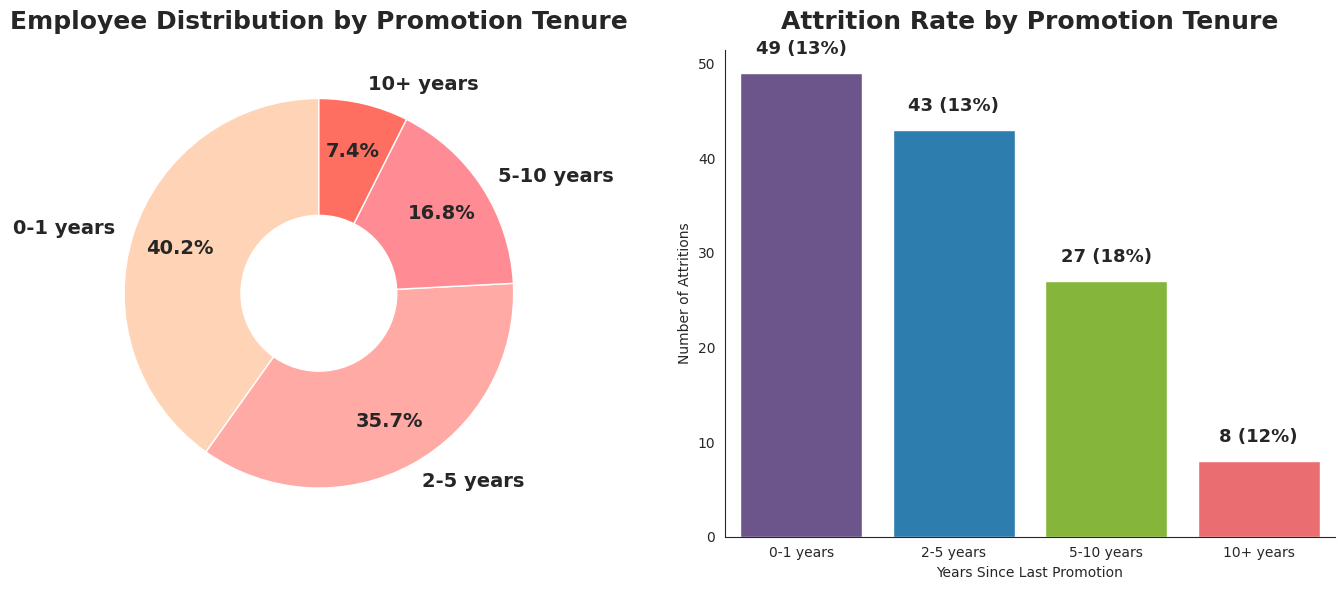

In [ ]:
# Defining bins and labels for grouping Years Since Last Promotion
promotion_bins = [0, 1, 5, 10, 20]
promotion_labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

# Grouping the data into defined promotion intervals
df["PromotionTenureGroup"] = pd.cut(df["YearsSinceLastPromotion"], bins=promotion_bins, labels=promotion_labels)

# Set up the figure layout
plt.figure(figsize=(14, 6))

# Subplot 1: Pie chart showing employee distribution by promotion group
plt.subplot(1, 2, 1)
distribution = df["PromotionTenureGroup"].value_counts().sort_index()
plt.pie(
    distribution.values,
    labels=distribution.index,
    autopct="%.1f%%",
    pctdistance=0.75,
    startangle=90,
    colors=['#FFD3B6', '#FFAAA5', '#FF8C94', '#FF6F61'],
    textprops={"fontweight": "bold", "fontsize": 14}
)
plt.title("Employee Distribution by Promotion Tenure", fontsize=18, fontweight="bold", pad=15)
center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)

# Subplot 2: Bar chart showing attrition by promotion tenure group
plt.subplot(1, 2, 2)
attrition_data = df[df["Attrition"] == "Yes"]
attrition_counts = attrition_data["PromotionTenureGroup"].value_counts().sort_index()
attrition_percent = np.floor((attrition_counts / distribution) * 100).fillna(0).astype(int)
sns.despine()

# Remove grid before plotting
sns.set_style("white")
sns.barplot(
    x=attrition_counts.index,
    y=attrition_counts.values,
    palette=["#6A4C93", "#1982C4", "#8AC926", "#FF595E"]
)

# Annotate each bar with count and percentage
for idx, value in enumerate(attrition_counts.values):
    plt.text(idx, value + 2, f"{value} ({attrition_percent[idx]}%)",
             ha='center', fontsize=13, fontweight='bold')

plt.title("Attrition Rate by Promotion Tenure", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Number of Attritions")
plt.grid(False)
plt.tight_layout()
plt.show()


The visualizations above provide a comprehensive overview of employee attrition in relation to the number of years since their last promotion. The pie chart on the left shows the distribution of employees across different promotion tenures, revealing that a substantial portion of the workforce (40.2%) has not received a promotion in the last 0–1 year, followed closely by those in the 2–5 years category (35.7%). A smaller share of employees fall into the 5–10 years (16.8%) and 10+ years (7.4%) categories, suggesting that most employees receive promotions within the first five years of tenure with their current company.

The bar chart on the right sheds light on the attrition patterns across these tenure groups. Interestingly, the attrition rates for employees who were last promoted within 0–1 year (13%) and 2–5 years (13%) are relatively similar, indicating that recent promotions may not be a strong deterrent against turnover. However, the highest attrition rate (18%) is observed among those who were last promoted 5–10 years ago, suggesting that a prolonged lack of advancement during this mid-career period may lead to dissatisfaction and increased resignations. Notably, employees who have not been promoted in over 10 years exhibit the lowest attrition rate (12%), possibly reflecting a cohort that is more settled or approaching the later stages of their careers. Overall, the data underscores the importance of timely career progression as a factor in employee retention, particularly during the 5–10 year window.

**16- Analyzing Employee Attrition by Years in Current Role**

**Question: Does staying too long in the same role without progression increase the likelihood of employee attrition?**

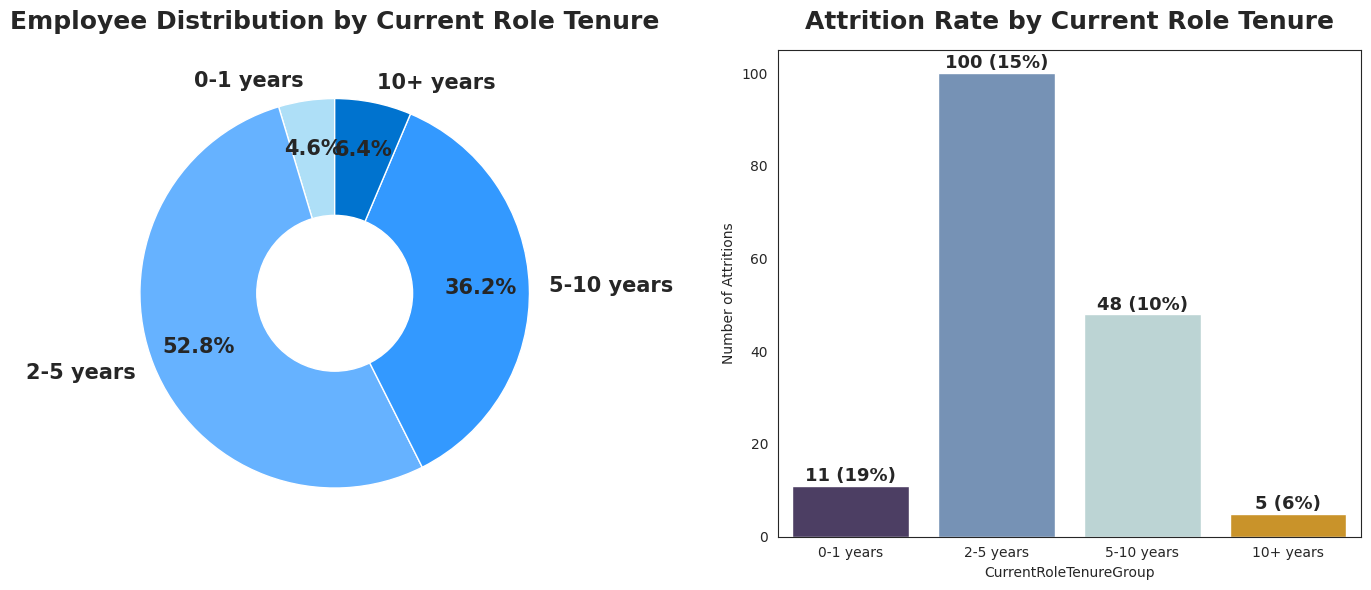

In [ ]:
# Analyzing Employee Attrition by Tenure in Current Rol

# Defining tenure bins and labels
role_bins = [0, 1, 5, 10, 20]
role_labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

#Categorizing employees based on tenure in current role
df['CurrentRoleTenureGroup'] = pd.cut(df['YearsInCurrentRole'], bins=role_bins, labels=role_labels)

# Plotting employee distribution and attrition by role tenure
plt.figure(figsize=(14, 6))

# Subplot 1: Overall distribution of employees by role tenure
plt.subplot(1, 2, 1)
group_counts = df['CurrentRoleTenureGroup'].value_counts().sort_index()

plt.pie(
    group_counts.values,
    labels=group_counts.index,
    autopct="%.1f%%",
    startangle=90,
    pctdistance=0.75,
    colors=['#AEDFF7', '#66B2FF', '#3399FF', '#0073CF'],
    textprops={'fontsize': 15, 'fontweight': 'bold'}
)
center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)
plt.title("Employee Distribution by Current Role Tenure", fontsize=18, fontweight="bold", pad=15)

# Subplot 2: Attrition rates by tenure in current role
plt.subplot(1, 2, 2)
attrited_employees = df[df['Attrition'] == 'Yes']
attrition_counts = attrited_employees['CurrentRoleTenureGroup'].value_counts().sort_index()

# Calculate attrition rate by group
attrition_percentage = np.floor((attrition_counts / group_counts) * 100).fillna(0).astype(int)

# Plot attrition bar chart
sns.barplot(
    x=attrition_counts.index,
    y=attrition_counts.values,
    palette=["#4B3869", "#6C91BF", "#B8D8D8", "#E49B0F"]
)

# Annotate bars with count and percentage
for idx, val in enumerate(attrition_counts.values):
    plt.text(idx, val + 1, f"{val} ({attrition_percentage[idx]}%)", ha="center", fontsize=13, fontweight='bold')

plt.title("Attrition Rate by Current Role Tenure", fontsize=18, fontweight="bold", pad=15)
plt.ylabel("Number of Attritions")
plt.tight_layout()
plt.show()


The plot provides a comprehensive visualization of employee distribution and attrition rates based on tenure in their current roles. On the left, the donut chart illustrates that the majority of employees have been in their current roles for 2–5 years (52.8%), followed by 5–10 years (36.2%), indicating a stable mid-level workforce. Smaller proportions fall into the 0–1 year (4.6%) and 10+ year (6.4%) tenure groups. On the right, the bar chart reveals a striking insight into attrition patterns. Employees in the 2–5 year tenure bracket exhibit the highest number of resignations (100), accounting for 15% of that group. Interestingly, while the 0–1 year group has fewer employees overall, it shows the highest attrition rate at 19%, suggesting early disengagement or mismatch between expectations and reality. Conversely, long-tenured employees (10+ years) display the lowest attrition rate at just 6%, indicating greater organizational commitment or satisfaction among seasoned staff. These trends underscore the importance of proactive engagement strategies, particularly for employees within their first five years in a role, to enhance retention and career progression satisfaction.

**17- Analyzing Employee Attrition by Years At Company**

**Question : Does the length of time an employee has spent at the company influence their decision to leave?**

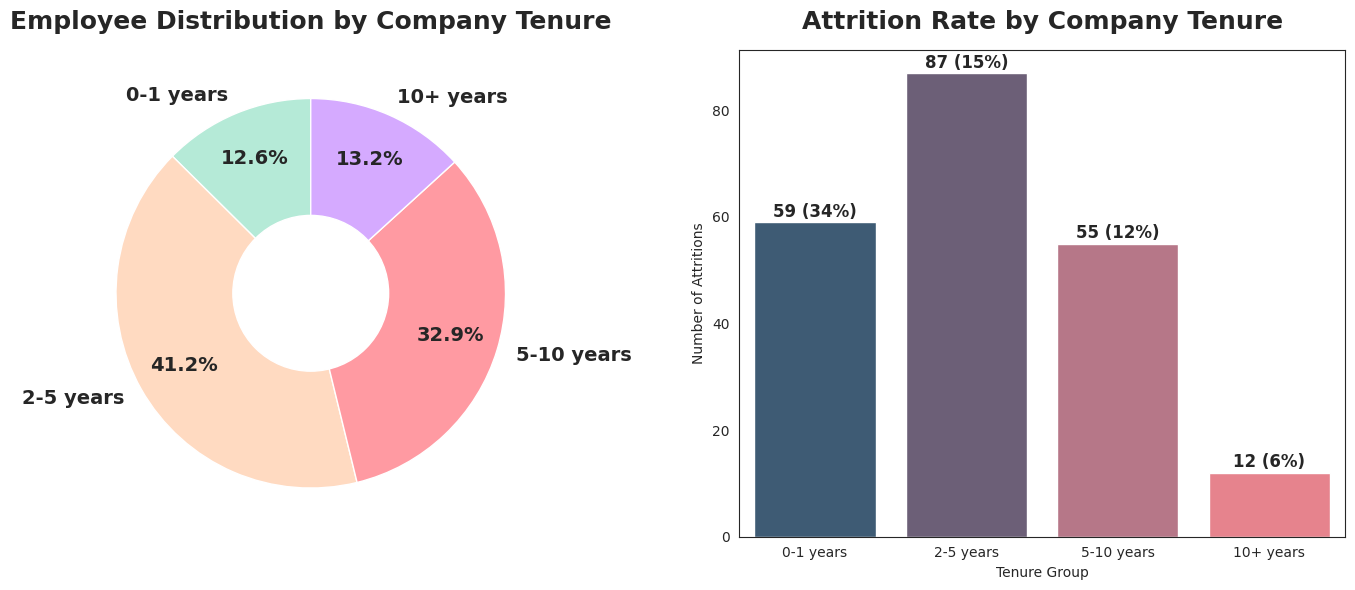

In [ ]:
# Defining custom bins and labels for tenure groups
bins = [0, 1, 5, 10, 20]
labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

# Creating a new column that groups employees by years at the company
df["YearsAtCompanyGroup"] = pd.cut(df["YearsAtCompany"], bins=bins, labels=labels)

# Preparing figure
plt.figure(figsize=(14, 6))

# Subplot 1: Pie Chart - Employee Distribution by Company Tenure
plt.subplot(1, 2, 1)
employee_counts = df["YearsAtCompanyGroup"].value_counts().sort_index()

# Defining color scheme for the pie chart
pie_colors = ['#B5EAD7', '#FFDAC1', '#FF9AA2', '#D5AAFF']

plt.pie(
    employee_counts.values,
    labels=employee_counts.index,
    autopct="%.1f%%",
    startangle=90,
    pctdistance=0.75,
    colors=pie_colors,
    textprops={"fontweight": "bold", "fontsize": 14}
)

# Adding white center for donut style
plt.gca().add_artist(plt.Circle((0, 0), 0.4, color='white'))
plt.title("Employee Distribution by Company Tenure", fontsize=18, fontweight="bold", pad=15)

# Subplot 2: Bar Chart - Attrition Count and Rate by Company Tenure
plt.subplot(1, 2, 2)
attrition_data = df[df["Attrition"] == "Yes"]
attrition_counts = attrition_data["YearsAtCompanyGroup"].value_counts().sort_index()

# Calculating attrition percentage relative to each group
attrition_percentage = np.floor((attrition_counts / employee_counts) * 100).fillna(0).astype(int)

# Updating color scheme for bar chart
bar_colors = ['#355C7D', '#6C5B7B', '#C06C84', '#F67280']

sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette=bar_colors)
plt.title("Attrition Rate by Company Tenure", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Tenure Group")
plt.ylabel("Number of Attritions")

# Adding text annotations above bars
for i, count in enumerate(attrition_counts.values):
    label = f"{count} ({attrition_percentage[i]}%)"
    plt.text(i, count + 1, label, ha='center', fontsize=12, fontweight='bold')

# Final layout adjustment
plt.tight_layout()
plt.show()


The visualization presents a compelling overview of employee distribution and attrition trends categorized by years at the company, offering key insights into tenure-related retention patterns. On the left, the donut chart illustrates that the majority of employees have been with the company for 2-5 years (41.2%), followed by those in the 5-10 years group (32.9%). Notably, both 0-1 year and 10+ years tenure groups represent a much smaller share of the workforce, at approximately 12-13% each. On the right, the bar chart shows the absolute number of employees who left the company within each tenure category, along with their respective attrition rates. Employees with the shortest tenure, 0-1 years, experienced the highest attrition rate at 34%, indicating that new hires are significantly more likely to resign or be terminated shortly after joining. The 2-5 years group, while having the largest population, had an attrition rate of 15%, suggesting a moderate risk period. Meanwhile, the 5-10 years and 10+ years groups reported much lower attrition rates of 12% and 6%, respectively, pointing to higher employee stability and retention among longer-serving staff. These findings highlight the critical importance of onboarding, engagement, and early-stage retention strategies to mitigate early attrition and improve overall workforce longevity.

**18 - Analyzing Employee Attrition by Total Working Experience**

**Question : Is lack of overall work experience contributing to higher employee attrition?**

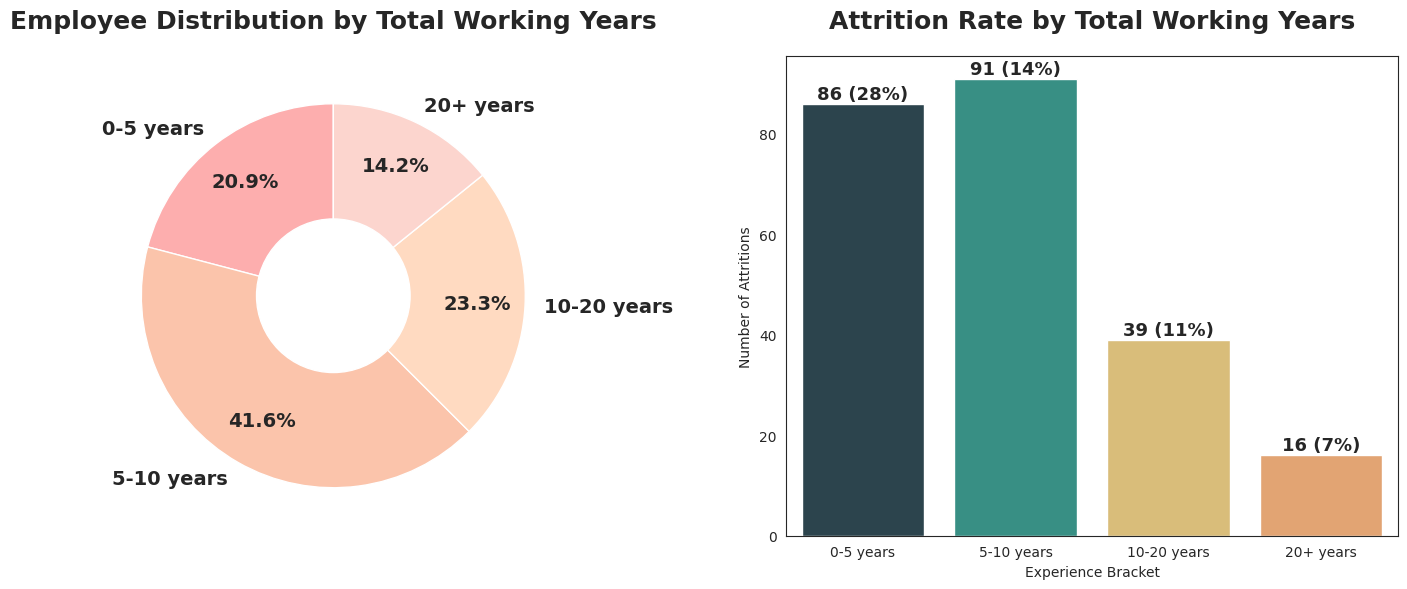

In [ ]:
# Categorizing 'TotalWorkingYears' into defined experience brackets
experience_bins = [0, 5, 10, 20, 50]
experience_labels = ['0-5 years', '5-10 years', '10-20 years', '20+ years']
df["WorkingExperienceGroup"] = pd.cut(df['TotalWorkingYears'],
                                                 bins=experience_bins,
                                                 labels=experience_labels)

# Prepare figure for side-by-side visualizations
plt.figure(figsize=(14, 6))

# Plot 1: Employee distribution across total working experience groups
plt.subplot(1, 2, 1)
experience_counts = df["WorkingExperienceGroup"].value_counts().sort_index()
plt.pie(
    experience_counts.values,
    labels=experience_counts.index,
    autopct="%.1f%%",
    pctdistance=0.75,
    startangle=90,
    colors=['#FDAEAE', '#FBC4AB', '#FFDAC1', '#FCD5CE'],
    textprops={"fontsize": 14, "fontweight": "bold"}
)
# Add a white center circle for donut effect
plt.gca().add_artist(plt.Circle((0, 0), 0.4, color='white'))

plt.title("Employee Distribution by Total Working Years", fontsize=18, fontweight="bold", pad=20)

# Plot 2: Attrition rate by working experience group
plt.subplot(1, 2, 2)
attrited_employees = df[df["Attrition"] == "Yes"]
attrition_counts = attrited_employees["WorkingExperienceGroup"].value_counts().sort_index()

# Calculate attrition percentages for each group
attrition_percentages = np.floor((attrition_counts / experience_counts) * 100).values

# Plot bar chart
bar_palette = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261']
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette=bar_palette)

# Annotate bars with values and percentages
for i, val in enumerate(attrition_counts.values):
    label = f"{val} ({int(attrition_percentages[i])}%)"
    plt.text(i, val + 1, label, ha='center', fontsize=13, fontweight="bold")

plt.title("Attrition Rate by Total Working Years", fontsize=18, fontweight="bold", pad=20)
plt.ylabel("Number of Attritions")
plt.xlabel("Experience Bracket")
plt.tight_layout()
plt.show()


The visualizations above provide insights into how total working experience influences employee attrition. The left donut chart displays the overall distribution of employees across four experience brackets: 0–5 years, 5–10 years, 10–20 years, and over 20 years. Notably, the majority of the workforce (41.6%) falls within the 5–10 years category, followed by 10–20 years (23.3%) and 0–5 years (20.9%). Employees with over 20 years of experience represent the smallest group at just 14.2%. On the right, the bar chart explores how attrition varies across these experience levels. Interestingly, although employees with 5–10 years of experience make up the largest portion of the workforce, those with 0–5 years have the highest attrition rate at 28%, suggesting that early-career employees are significantly more likely to leave. In contrast, attrition rates decrease steadily with increased tenure, dropping to just 7% for employees with more than 20 years of experience. This trend underscores the importance of targeted retention strategies for early-career employees, who appear to be at greater risk of leaving the organization.